<a href="https://colab.research.google.com/github/Us9r/DicodingBMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Us9r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.



---


## Pengenalan Dataset Diets Nutrition

Dataset **Diets Nutrition** berisi informasi nutrisi dari **7806 resep** yang mencakup berbagai jenis diet (seperti **paleo**, **keto**, **vegan**) dan masakan (seperti **Amerika**, **Meksiko**, **Asia**). Dataset ini mencakup nilai **protein**, **karbohidrat**, dan **lemak**, yang berguna untuk analisis data dan pembelajaran mesin terkait makanan dan kesehatan.

### Sumber Dataset

Dataset ini diambil dari **Kaggle**, platform data terbuka yang menyediakan berbagai dataset untuk analisis, penelitian, dan kompetisi. Dataset ini diunggah oleh pengguna bernama **"onydrive".**<sup>[[1]]*credit belong to respective owner.*</sup>

### Ketentuan Dataset

- **Tanpa Label**: Dataset tidak memiliki label atau kelas.
- **Jumlah Baris**: Terdiri dari **7806 baris**.
- **Tipe Data**: Mengandung data:
  - **Kategorikal**: (seperti `Diet_type` dan `Cuisine_type`)
  - **Numerikal**: (seperti `Protein(g)`, `Carbs(g)`, dan `Fat(g)`)

[1]: https://www.kaggle.com/datasets/onydrive/diets-nutrition-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Us9r/vault/main/DicodingBMLP/All_Diets.csv")
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

###**1. Memahami Struktur data**
struktur dataset memiliki 3 fitur numerical dan 5 fitur kategorikal dengan 2 diantaranya seharusnya adalah datetype tetapi tidak perlu diubah karena tidak diperlukan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


###**2. Menangani data yang hilang**
 memeriksa missing value, tidak ditemukan.

In [4]:
df.isnull().sum()

,0
Diet_type,0
Recipe_name,0
Cuisine_type,0
Protein(g),0
Carbs(g),0
Fat(g),0
Extraction_day,0
Extraction_time,0


###**3. Analisis Distribusi dan Korelasi**
Nilai maksimum untuk protein, karbohidrat, dan lemak sangat tinggi (1273.61, 3405.55, dan 1930.24), menunjukkan bahwa ada beberapa resep dengan kandungan nutrisi yang sangat tinggi. Nilai-nilai ini mungkin perlu diinvestigasi lebih lanjut untuk memastikan keakuratannya atau untuk mengidentifikasi outlier.

In [5]:
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


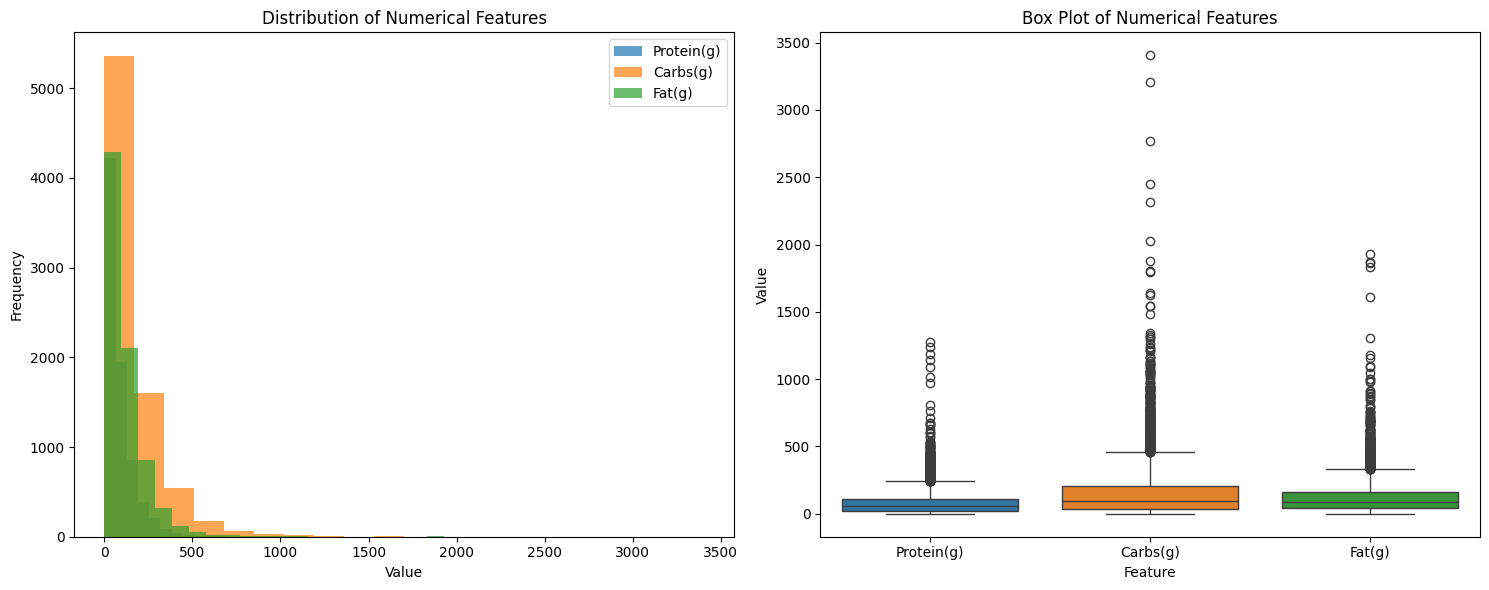

In [15]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Histogram
for column in ['Protein(g)', 'Carbs(g)', 'Fat(g)']:
    axes[0].hist(df[column], bins=20, alpha=0.7, label=column)
axes[0].set_title('Distribution of Numerical Features')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
sns.boxplot(data=df[['Protein(g)', 'Carbs(g)', 'Fat(g)']], ax=axes[1])
axes[1].set_title('Box Plot of Numerical Features')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Value')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [17]:
correlation_matrix = df[['Protein(g)', 'Carbs(g)', 'Fat(g)']].corr()
print(correlation_matrix)

            Protein(g)  Carbs(g)    Fat(g)
Protein(g)    1.000000  0.155682  0.478012
Carbs(g)      0.155682  1.000000  0.269059
Fat(g)        0.478012  0.269059  1.000000


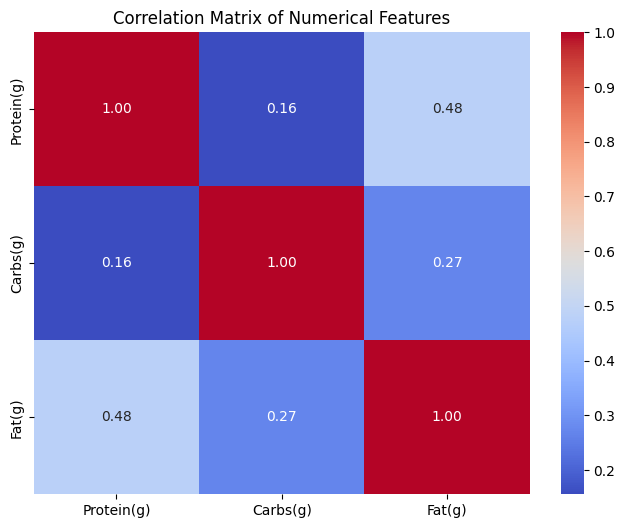

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

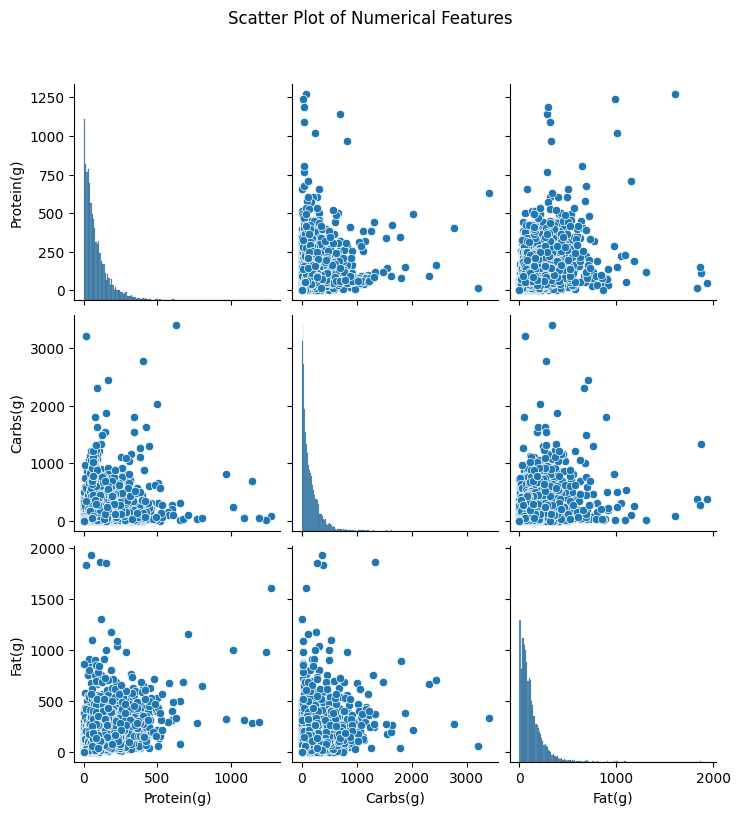

In [25]:
g = sns.pairplot(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])    #g disini untuk menangkap niali plot
g.fig.suptitle('Scatter Plot of Numerical Features', y=1.08)  # Adjust y to move title up
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
df = df.drop(columns=['Recipe_name','Extraction_day', 'Extraction_time'])

df

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,american,5.22,1.29,3.20
1,paleo,south east asian,181.55,28.62,146.14
2,paleo,american,30.91,302.59,96.76
3,paleo,mexican,9.62,75.78,59.89
4,paleo,chinese,39.84,54.08,71.55
...,...,...,...,...,...
7801,dash,italian,85.20,288.14,137.15
7802,dash,american,141.98,123.18,323.50
7803,dash,world,0.01,0.39,0.00
7804,dash,american,155.38,239.88,260.84


In [ ]:
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
29,paleo,french,78.59,290.10,84.95
77,paleo,american,189.35,143.25,300.66
80,paleo,american,46.07,261.60,147.50
286,paleo,italian,96.21,128.43,115.48
354,paleo,chinese,39.84,54.08,71.55
...,...,...,...,...,...
7801,dash,italian,85.20,288.14,137.15
7802,dash,american,141.98,123.18,323.50
7803,dash,world,0.01,0.39,0.00
7804,dash,american,155.38,239.88,260.84


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for column in df.select_dtypes(include=['object']).columns: # pilih kolom bertipe 'object'
       print(f"\nColumn: {column}")
       print("Unique Values:", df[column].unique())
       print("Value Counts:\n", df[column].value_counts())


Column: Diet_type
Unique Values: ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']
Value Counts:
 Diet_type
dash             1704
mediterranean    1694
vegan            1499
keto             1493
paleo            1245
Name: count, dtype: int64

Column: Cuisine_type
Unique Values: ['american' 'south east asian' 'mexican' 'chinese' 'mediterranean'
 'italian' 'french' 'indian' 'nordic' 'eastern europe' 'central europe'
 'kosher' 'british' 'caribbean' 'south american' 'middle eastern' 'asian'
 'japanese' 'world']
Value Counts:
 Cuisine_type
american            2852
mediterranean       1689
italian              783
french               590
world                248
british              237
mexican              221
nordic               147
south east asian     146
south american       135
asian                125
chinese              118
indian                92
middle eastern        91
eastern europe        53
japanese              49
central europe        34
caribbean             18
kosher  

In [ ]:
def group_cuisine(cuisine):
    if cuisine in ["american", "british", "mexican", "south american"]:
        return "Amerika"
    elif cuisine in ["mediterranean", "italian", "french", "nordic", "eastern europe", "central europe"]:
        return "Eropa"
    elif cuisine in ["asian","south east asian", "chinese", "indian", "japanese", "middle eastern"]:
        return "Asia"
    elif cuisine in ["caribbean", "kosher", "world"]:
        return "World"
    else:
        return "Other"  # Handling untuk cuisine yang tidak terdefinisi

df['Cuisine_Group'] = df['Cuisine_type'].str.lower().apply(group_cuisine)
df = df.drop(columns=['Cuisine_type'])

In [ ]:
for column in df.select_dtypes(include=['object']).columns: # pilih kolom bertipe 'object'
       print(f"\nColumn: {column}")
       print("Unique Values:", df[column].unique())
       print("Value Counts:\n", df[column].value_counts())


Column: Diet_type
Unique Values: ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']
Value Counts:
 Diet_type
dash             1704
mediterranean    1694
vegan            1499
keto             1493
paleo            1245
Name: count, dtype: int64

Column: Cuisine_Group
Unique Values: ['Amerika' 'Asia' 'Eropa' 'World']
Value Counts:
 Cuisine_Group
Amerika    3445
Eropa      3296
Asia        621
World       273
Name: count, dtype: int64


In [ ]:
df

,Diet_type,Protein(g),Carbs(g),Fat(g),Cuisine_Group
0,paleo,5.22,1.29,3.20,Amerika
1,paleo,181.55,28.62,146.14,Asia
2,paleo,30.91,302.59,96.76,Amerika
3,paleo,9.62,75.78,59.89,Amerika
4,paleo,39.84,54.08,71.55,Asia
...,...,...,...,...,...
7786,dash,85.20,288.14,137.15,Eropa
7787,dash,141.98,123.18,323.50,Amerika
7788,dash,0.01,0.39,0.00,World
7789,dash,155.38,239.88,260.84,Amerika


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.